In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data_science_salary_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_Text,job_state,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,24,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simpl(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
def seniortiy(title):
    if "sr" in title.lower() or "senior" in title.lower() or "sr" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"
    

In [6]:
df["job_simple"]=df["Job Title"].apply(title_simpl)

In [7]:
df["job_simple"].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simple, dtype: int64

In [8]:
df["seniortiy"]=df["Job Title"].apply(seniortiy)
df["seniortiy"].value_counts()

na        520
senior    220
jr          2
Name: seniortiy, dtype: int64

In [9]:
df["job_state"]=df["job_state"].apply(lambda x:x.strip() if x.strip().lower()!="los angeles" else "CA")
df["job_state"].value_counts()
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simple,seniortiy
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,49,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,38,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,12,1,0,1,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,57,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,24,1,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,MA,0,192,0,0,0,1,0,na,senior
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,TN,0,16,1,0,1,1,0,data engineer,senior
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,PA,1,38,0,0,0,0,1,na,na
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,PA,0,-1,0,0,0,0,1,manager,na


In [10]:
df["desc_len"]=df["Job Description"].apply(lambda x:len(x))
df["desc_len"]

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [11]:
df["num_of_Competitors"]=df["Competitors"].apply(lambda x:len(x.split(",")) if x !="-1" else 0)

In [12]:
df["num_of_Competitors"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_of_Competitors, Length: 742, dtype: int64

In [13]:
df["min_salary"]=df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)
df["max_salary"]=df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary,axis=1)

In [14]:
df[df.hourly==1][["hourly","min_salary","max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
df.Company_Text

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_Text, Length: 742, dtype: object

In [16]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len,num_of_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


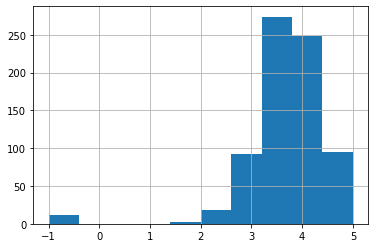

In [17]:
df.Rating.hist();

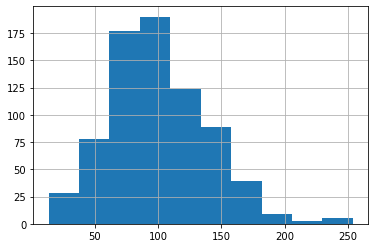

In [18]:
df.avg_salary.hist();

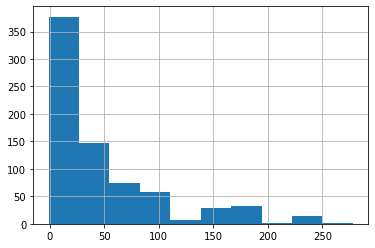

In [19]:
df.age.hist();

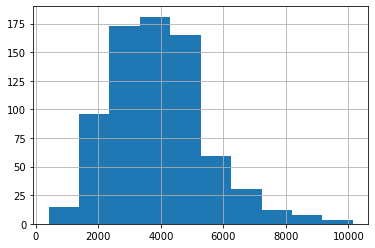

In [20]:
df.desc_len.hist();

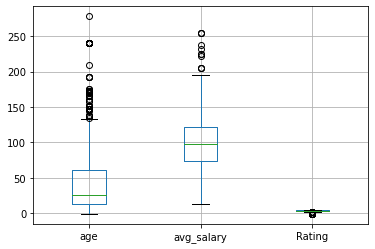

In [21]:
df.boxplot(column=["age","avg_salary","Rating"]);

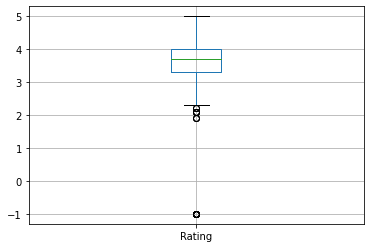

In [22]:
df.boxplot(column="Rating");

In [23]:
df[["age","avg_salary","Rating"]].corr()

,age,avg_salary,Rating
age,1.000000,0.019492,0.024665
avg_salary,0.019492,1.000000,0.013492
Rating,0.024665,0.013492,1.000000


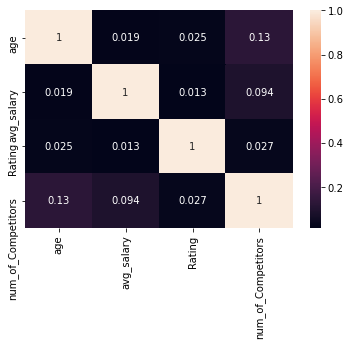

In [24]:
sns.heatmap(df[["age","avg_salary","Rating","num_of_Competitors"]].corr(),annot=True);

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simple', 'seniortiy', 'desc_len',
       'num_of_Competitors'],
      dtype='object')

In [26]:
df_cat=df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',"Company_Text","job_state","same_state",'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simple', 'seniortiy']]

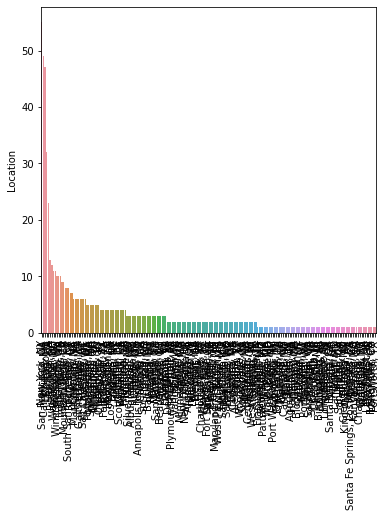

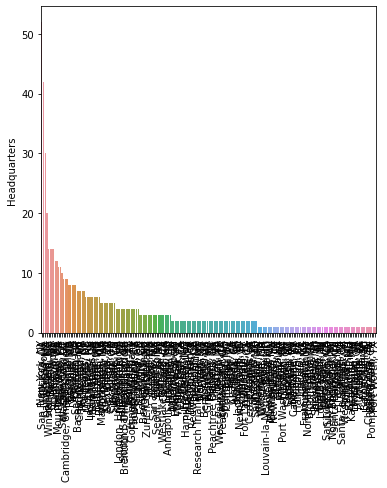

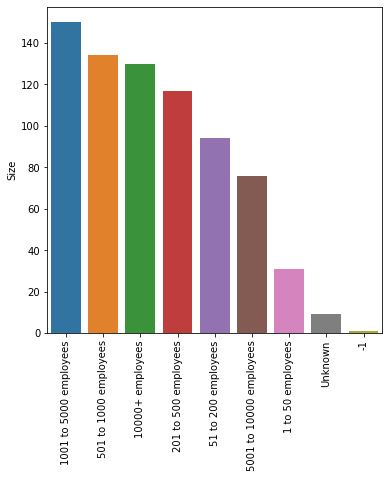

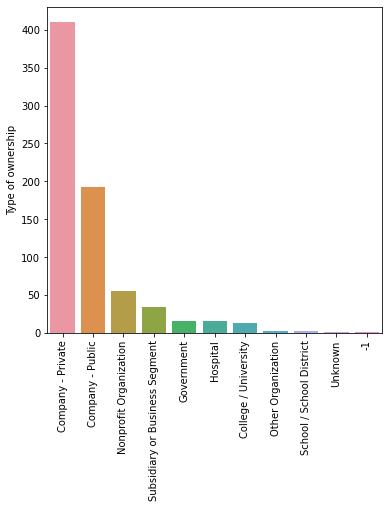

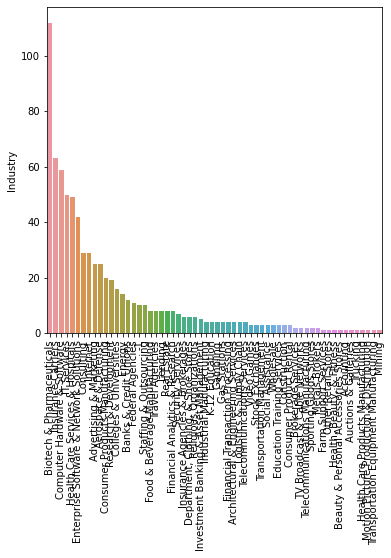

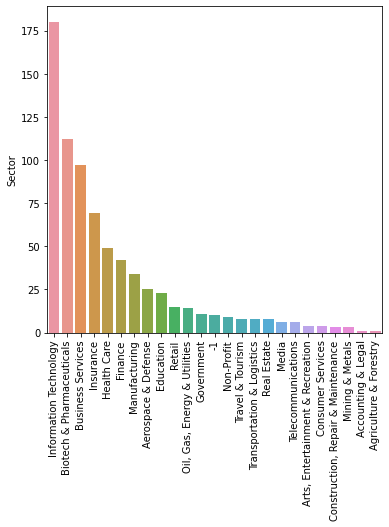

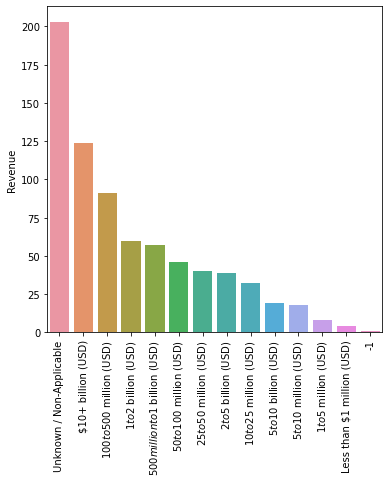

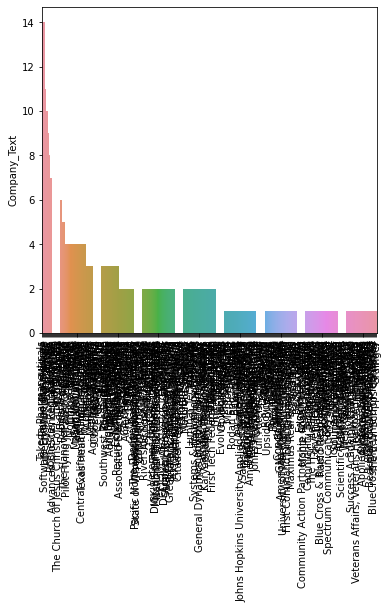

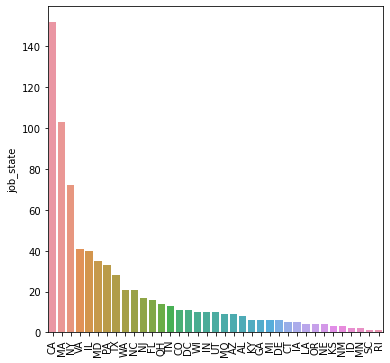

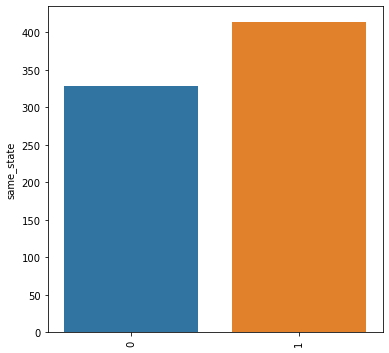

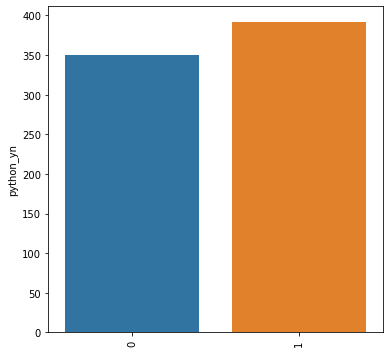

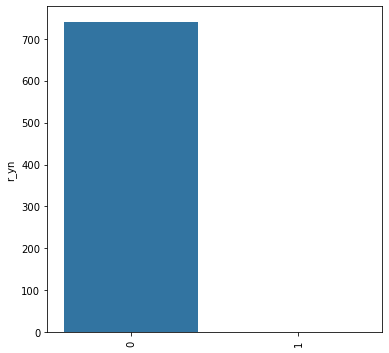

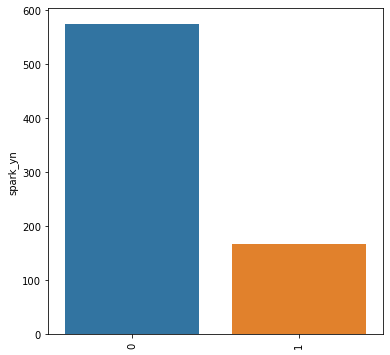

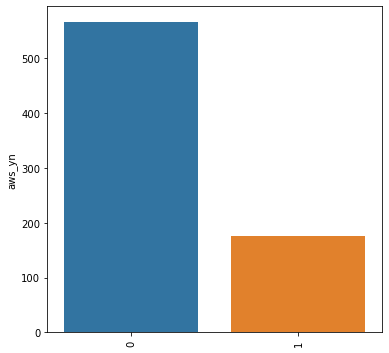

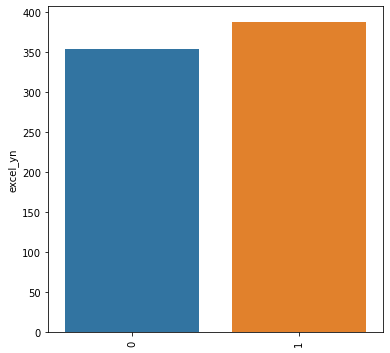

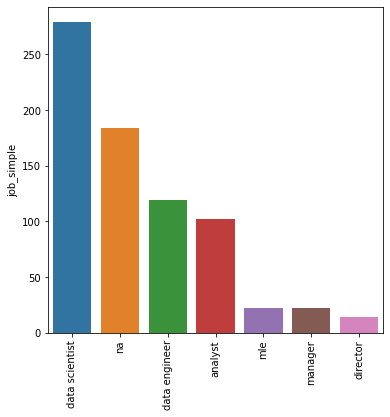

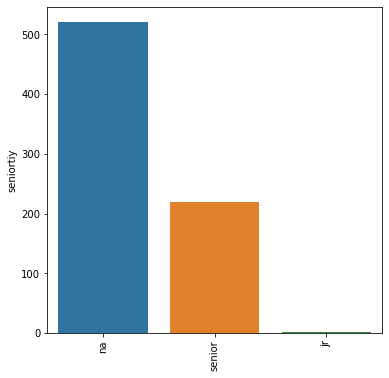

In [27]:
for i in df_cat:
    plt.figure(figsize=(6,6))
    sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts(),data=df)
    plt.xticks(rotation=90)
    plt.show()

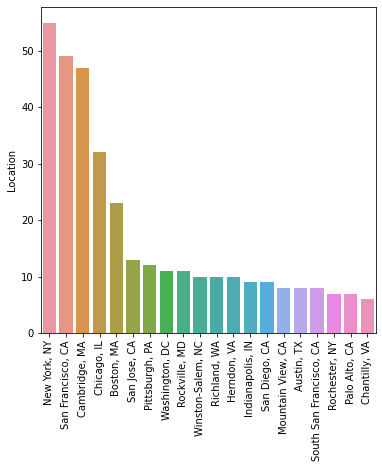

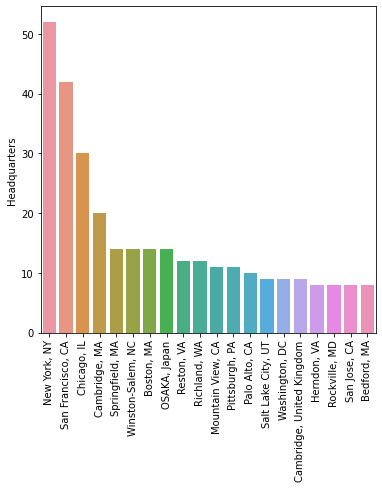

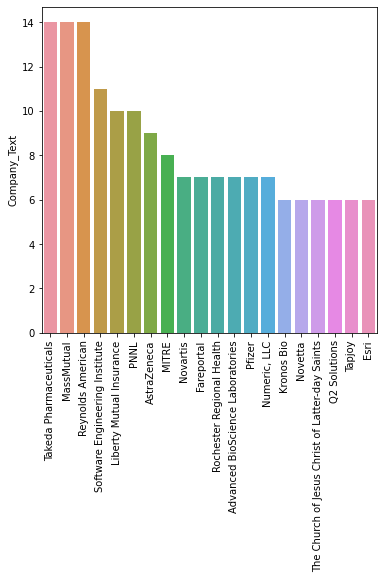

In [28]:
for i in df_cat[["Location","Headquarters","Company_Text"]].columns:
    plt.figure(figsize=(6,6))
    sns.barplot(x=df_cat[i].value_counts()[:20].index,y=df_cat[i].value_counts()[:20],data=df)
    plt.xticks(rotation=90)
    plt.show()

In [29]:
pd.pivot_table(df,index=["job_simple","seniortiy"],values="avg_salary")

avg_salary
job_simple     seniortiy            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [30]:
pd.pivot_table(df,index=["job_state","job_simple"],values="avg_salary").sort_values("job_state",ascending=False)

avg_salary
job_state job_simple                
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [31]:
pd.options.display.max_rows

60

In [32]:
pd.pivot_table(df,index=["job_state","job_simple"],values="avg_salary").sort_values("job_state",ascending=False)

avg_salary
job_state job_simple                
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [33]:
pd.set_option("display.max_rows",None)

In [34]:
pd.pivot_table(df,index=["job_state","job_simple"],values="avg_salary",aggfunc="count").sort_values("job_state",ascending=False)

avg_salary
job_state job_simple                
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [35]:
pd.pivot_table(df[df["job_simple"]=="data scientist"],index=["job_state","job_simple"],values="avg_salary").sort_values("avg_salary",ascending=False)

,,avg_salary
job_state,job_simple,
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [36]:
df_pivots=df[["Rating","Industry","Sector","Revenue","num_of_Competitors","hourly","employer_provided","python_yn","r_yn","spark_yn","aws_yn","excel_yn","desc_len","Type of ownership","avg_salary"]]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values="avg_salary").sort_values("avg_salary",ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots,index="Revenue",columns="python_yn",values="avg_salary")

In [ ]:
pd.pivot_table(df_pivots,index="Revenue",columns="python_yn",values="avg_salary",aggfunc="count")

In [38]:
df.to_csv("EDA_data.csv",index=False)